In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import random
import pandas as pd

In [10]:
##Simulate a decision-making optimization strategy with three arms: 30%, 60%, and 90%.

#clear
ab = ([5,10], [5,10], [5,10]) #prior assumption: 1/3 for each
p = [0.3, 0.6, 0.9] #true probability of the arms
w_1=0.3 #initial accuracy of execution for the optimal learning rule
w_2=1
w_3=0.4
N = 3 #number of arms

In [11]:
# for testing 
# ab[0][0]
# arm1=1
# prob = []
# ab[arm1][0]/((ab[arm1][0] + ab[arm1][1]))

# for i in range(3):
# # prob[0]=ab[arm1][0]/((ab[arm1][0] + ab[arm1][1]))
#     prob=np.append(prob,ab[arm1][0]/((ab[arm1][0] + ab[arm1][1])))
# prob

In [18]:
def det_range_w(rand,decision_list):
    # determine which range that rand falls into
    counter=0
    if rand >=decision_list[0] and rand <decision_list[1]:
        counter=0
    elif rand >=decision_list[1] and rand <decision_list[2]:
        counter=1
    elif rand >=decision_list[2] and rand <=decision_list[3]:
        counter=2
    return counter

In [19]:
def compute_w(weighted):
    data = np.zeros((4, 100))#create empty matrix

    for trial in range(100):
        post_prob = []
        P_D = np.zeros((1,3))
        for arm1 in range(3):
            post_prob=np.append(post_prob,ab[arm1][0]/((ab[arm1][0] + ab[arm1][1])))


        # calcualte the suboptimal decision rule
        Nmax = sum((post_prob == max(post_prob)))
        # In case all arms have the same probability
        if Nmax == N:
            P_D = post_prob
        else:
            for arm in range(3):
                if post_prob[arm] == max(post_prob):
                    P_D[arm] = weighted/Nmax
                else:
                    P_D[arm] = (1 - weighted)/(N-Nmax)        
    #     print("P_D value: ",P_D)   


        # A decision-result(either 0,1, or 2) is made based on the prob of choosing 
        # each ice hole, based on the suboptimal decision rule
        # decisions return in the variable: result
        decision_range = np.cumsum([P_D]) 
        decision_list=np.append([0],decision_range) #[0.         0.33333333 0.66666667 1.        ]
        rand=round(random.uniform(0, 1),1)
        result=det_range_w(rand,decision_list)
    #     print(result)

        # reward outcome
        reward=np.random.multinomial(1,[p[result],1-p[result]])
    #     print(reward)

        new_1=ab[result][0]+reward[0]
        new_2=ab[result][1]+reward[1]

         # store in data
        data[0][trial] = trial
        data[1][trial] = result * 30
        data[2][trial] = reward[0]
        data[3][trial] = sum(data[2,1:trial]) 
    return data

In [71]:
def compute_w_avg(num_iterations,w_value):
    w_df_lst=[]
    for i in range(num_iterations):
        df=compute_w(w_value)
        w_df_lst.append(df[3:4])
        value=[val for sublist in w_df_lst for val in sublist]
        w_df=convert_to_df(value)
        avg_df=convert_to_df(w_df.mean(axis = 0)).T #with shape of (1,100)
    return avg_df
    

In [108]:
def three_w_avg(num_iterations,w1,w2,w3):
    w_lst=[]
    fst_w=compute_w_avg(num_iterations,w1)
    sec_w=compute_w_avg(num_iterations,w2)
    thr_w=compute_w_avg(num_iterations,w3)
    w_df=pd.concat([fst_w,sec_w,thr_w],axis=0)
    return w_df

In [109]:
#three_w_avg(3,w_1,w_2,w_3)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.666667,1.666667,2.000000,2.666667,3.000000,3.666667,4.000000,4.666667,...,56.000000,56.666667,57.666667,57.666667,57.666667,58.000000,58.000000,58.333333,59.333333,60.333333
0,0.0,0.0,1.000000,2.000000,2.333333,3.000000,3.666667,4.666667,5.333333,5.666667,...,53.666667,54.666667,54.666667,55.000000,55.333333,55.666667,56.333333,56.666667,57.333333,58.000000
0,0.0,0.0,0.666667,1.000000,1.333333,2.333333,3.333333,4.000000,4.666667,5.333333,...,52.333333,52.666667,53.333333,53.666667,54.000000,54.333333,55.000000,55.666667,56.666667,57.333333


In [111]:
#read files as df
file_lst=["s01_data","s02_data","s03_data"]
df_lst=[] #create a list of dfs
for file in file_lst:
    df=pd.read_csv(str(file),sep='\t',header=None)
    
    if (file=='s02_data') or (file=='s03_data'):
        df=df.iloc[[0,2,3,4],:]
        df_lst.append(df)
    else:
        df_lst.append(df)

# Plotting

In [112]:
# get x_values, y_values from one df,or data/data2/data3
def y_values(df):
#     x=df[0:1].values
#     x_val=[val for sublist in x for val in sublist]
#     print(x_val)
    if df.shape==(5,100):
        y=df[4:5].values
    else:
#         print(df.iloc[-1].values)
        y=df.iloc[-1].values
    
    y_val=[val for val in y]
#     print(y_val)
    return y_val # x_val can be generated later since all are same

In [113]:
# make a list of list (with y values)
def get_y_values(df_lst):
    y_label_lst=[]
    for df in df_lst:
#         print("load_df",type(df))
        y_current=y_values(df)
        y_label_lst.append(y_current)
    return y_label_lst

In [114]:
def convert_to_df(data):
    df = pd.DataFrame(data)
    return df

In [115]:
def plot_graph(orig_y_list,weight_y_list,label_w):
    fig, ax = plt.subplots()
    ax.set_ylim([0,80])
    x_val=np.arange(1,101,1)
    label=0
    counter=0
    for y_val in orig_y_list:
        ax.plot(x_val, y_val,label='subject '+str(label))
        label+=1
    for y_val in weight_y_list:
#         print(y_val)
        ax.plot(x_val, y_val,label='eG,w= '+label_w[counter])
        counter+=1
    plt.xlabel('Trial')
    plt.ylabel('reward score')
    leg = ax.legend()
    fig.show()

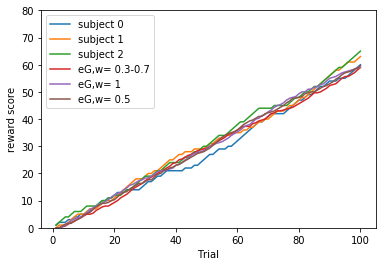

In [128]:
label_w=['0.3-0.7','1','0.5']
plot_list=[df_lst[0],df_lst[1],df_lst[2]]

orig_y_list=get_y_values(plot_list) # y values from the original df

#for here, I randomly assign 3 to num of iterations(could add more for calculating avg.)
weight_y_list=three_w_avg(3,w_1,w_2,w_3).values.tolist() 
plot_graph(orig_y_list,weight_y_list,label_w)